In [1]:
import csv, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
time_max = 100

df_apple = pd.read_csv('data/apple_prices.csv', names=['Price'], header=None)
apple = df_apple.Price.tolist()
apple = apple[:time_max]

df_ema12_heaan = pd.read_csv('data/ema12_heaan.csv', names=['Price'], header=None)
ema12_heaan = df_ema12_heaan.Price.tolist()

In [3]:
# Returns an n period exponential moving average for the time series data
def ema(ls, n):
    
    ema = []
    time = 1
    
    # get the average of the first n data points
    head = sum(ls[:n])/n
    multiplier = 2/float(1 + n)
    ema.append(head)

    # EMA(current) = ((Price(current) - EMA(prev) ) * Multiplier) + EMA(prev)
    ema.append(((ls[n] - head) * multiplier) + head)

    # calculate the rest of the values
    for price in ls[n+1:]:
        tmp = ((price - ema[time]) * multiplier) + ema[time]
        time = time + 1
        ema.append(tmp)
    return ema

In [4]:
# Extract the sign of a number
def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

In [5]:
# Calculate the percentage error between two lists of data
def pe(ls1, ls2):
    if len(ls1) != len(ls2):
        print("Error: the input lists are of different length!")
        return 0
    else:
        n = len(ls1)
        sm = 0
        for i in range(0, n):
            sm += abs((ls1[i]-ls2[i])/ls2[i])*100
        return sm/n

In [6]:
# A flipped ReLU function
def flip_relu(x):
    if x < 0:
        return -1
    else:
        return 0

In [7]:
# Return the trading decisions based on the MACD signals
def dec(macd):
    
    decisions = []

    for i in range(1, len(macd)):
        dec_point = flip_relu(macd[i-1]*macd[i])
        decision = sign(dec_point*(macd[i-1] - macd[i]))
        decisions.append(decision)
            
    return decisions

In [8]:
# Return the trading decisions based on the MACD signals by approximation
def dec_approx(macd, norm):
    
    decisions = []

    for i in range(1, len(macd)):
        mt_1 = norm*macd[i-1]
        mt = norm*macd[i]
        x = mt_1*mt
        tmp = 0.00002635*x**8 - 0.0003472*x**6 + 0.0052083*x**4 - 0.2*x**2 + 0.25*x - 0.061
        tmp *= (mt_1 - mt)
        decisions.append(tmp)
        
    return decisions

In [9]:
def list_to_csv(ls, filename):

    with open(filename, "w") as outfile:
        for x in ls:
            outfile.write(str(x))
            outfile.write("\n")

In [10]:
ema12_plaintext = ema(apple, 12)
# ema26 = ema(apple, 26)

# ema12 = ema12[14:]
# ema_diff = [ema12_i - ema26_i for ema12_i, ema26_i in zip(ema12, ema26)]

# ema9 = ema(ema_diff, 9)

# ema_diff = ema_diff[8:]
# macd_ema = [ema_diff_i - ema9_i for ema_diff_i, ema9_i in zip(ema_diff, ema9)]

# decisions_ema = dec(macd_ema)
# decisions_ema_approx = dec_approx(macd_ema)

# apple = apple[33:]
# ema12 = ema12[8:]
# ema26 = ema26[8:]

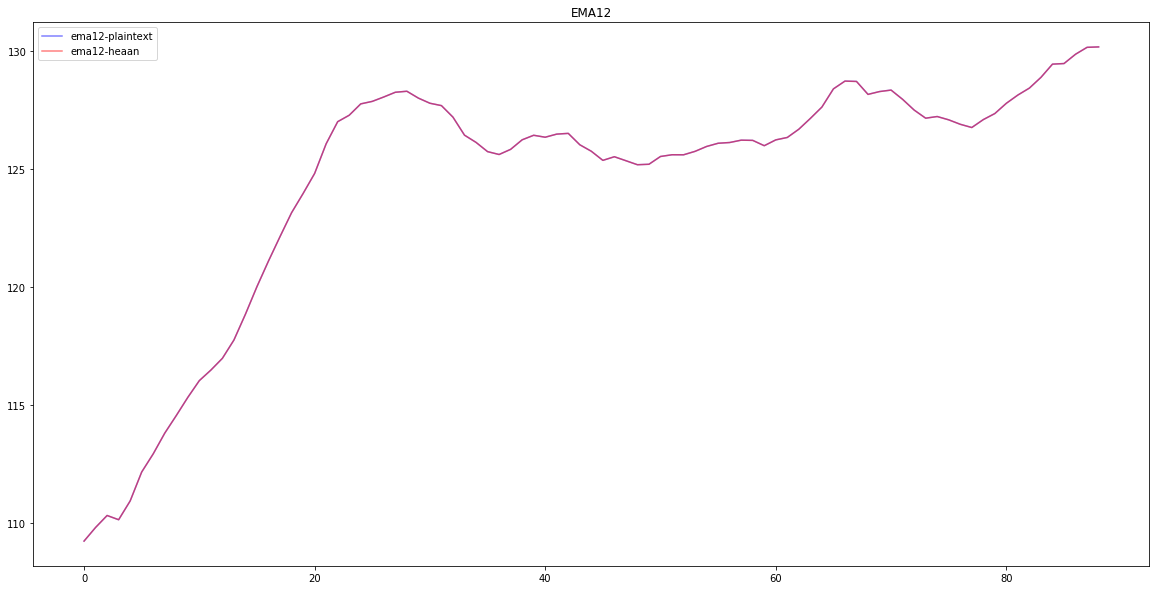

Percentage Error of EMA12-HEAAN:  0.00035 %


In [11]:
ema12_plaintext = ema12_plaintext[:90]
pe_ema12_heaan = pe(ema12_heaan, ema12_plaintext)

plt.figure(figsize=(20, 10))
plt.plot(ema12_plaintext, color='blue', alpha=0.5, label='ema12-plaintext')
plt.plot(ema12_heaan, color='red', alpha=0.5, label='ema12-heaan')
plt.title('EMA12')
plt.legend()
plt.show()

print("Percentage Error of EMA12-HEAAN: ", "%.5f" % pe_ema12_heaan, "%")

In [12]:
# # Plot the exponential moving averages, apple stock prices and trading decisions
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (20, 20))
# x_range = np.arange(0, len(macd_ema), 1)
# x_range2 = np.arange(0, len(decisions_ema), 1)
# x, y = [0, len(macd_ema)], [0, 0]

# ax1.plot(apple, color='red', alpha=0.5, label='apple stock price')
# ax1.plot(ema12, color='blue', alpha=0.5, label='wma12')
# ax1.plot(ema26, color='green', alpha=0.5, label='wma26')
# ax1.set_title('Apple Stock Prices')
# ax1.legend()

# ax2.plot(x, y)
# ax2.bar(x_range, macd_ema, color='blue', alpha=0.5, label='macd')
# ax2.plot(ema9, color='red', alpha=0.5, label='wma9(wma12-wma26)')
# ax2.plot(ema_diff, color='green', alpha=0.5, label='wma12-wma26')
# ax2.set_title('MACD Signal')
# ax2.legend()

# ax3.bar(x_range2, decisions_ema_approx, color='orange', alpha=0.5, label='decisions')
# ax3.plot(x, y)
# ax3.set_title('Approximate Trading Decisions')
# ax3.legend()

# ax4.bar(x_range2, decisions_ema, color='orange', alpha=0.5, label='decisions')
# ax4.plot(x, y)
# ax4.set_title('Trading Decisions')
# ax4.legend()

# plt.show()

In [13]:
list_to_csv(ema12_plaintext, 'data/ema12_plaintext.csv')
# list_to_csv(ema26, 'data/ema26.csv')
# list_to_csv(ema_diff, 'data/ema_diff.csv')
# list_to_csv(ema9, 'data/ema9.csv')
# list_to_csv(macd_ema, 'data/macd_ema.csv')
# list_to_csv(decisions_ema, 'data/decisions_ema.csv')
# list_to_csv(decisions_ema_approx, 'data/decisions_ema_approx.csv')

# print("Data Output Successful")